# Import Libraries and Dataset

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score

In [3]:
#Importing Dataset
names = ['Class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat'] 
data = pd.read_csv('D:\\Downloads\\breast-cancer.csv', names=names) 
array = data.values 
data.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


# Data Visualization

no-recurrence-events 201
recurrence-events 85


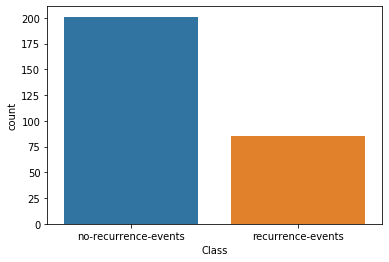

In [4]:
#Count the number of classes
import seaborn as sns
ax = sns.countplot(data['Class'] , label = 'Count')
Y, N = data['Class'].value_counts()
print('no-recurrence-events', Y)
print('recurrence-events', N)

# Data Pre-Processing

In [12]:
#Replace all the ?
data.replace('?', -99999, inplace = True)

#Replace all the dates
data.replace('Oct-14', -99999, inplace = True)
data.replace('05-Sep', -99999, inplace = True)
data.replace('06-Aug', -99999, inplace = True)
data.replace('09-Nov', -99999, inplace = True)
data.replace('03-May', -99999, inplace = True)
data.replace('Dec-14', -99999, inplace = True)

In [13]:
dataset = pd.get_dummies(data)
dataset.head()

,deg-malig,Class_no-recurrence-events,Class_recurrence-events,age_20-29,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,menopause_ge40,...,breast_left,breast_right,breast-quad_-99999,breast-quad_central,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,irradiat_no,irradiat_yes
0,3,1,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,2,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
2,2,1,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,2,1,0,0,0,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
4,2,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0


In [21]:
#Drop extra columns
dataset=dataset.drop(columns=['breast-quad_-99999'],axis=1)

In [22]:
cols = list(dataset.columns.values) 
cols.pop(cols.index('deg-malig'))
dataset = dataset[cols+['deg-malig']] 
dataset.head()

,Class_no-recurrence-events,Class_recurrence-events,age_20-29,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,menopause_ge40,menopause_lt40,...,breast_left,breast_right,breast-quad_central,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,irradiat_no,irradiat_yes,deg-malig
0,1,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,3
1,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,2
2,1,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,2
3,1,0,0,0,0,0,1,0,1,0,...,0,1,0,0,1,0,0,1,0,2
4,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,2


In [23]:
X=dataset.iloc[:, 3:]
y=dataset.iloc[:, 1:2]

In [24]:
# encode class values as integers
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)

C:\Users\ProBook\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [25]:
#standardizing the input feature
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X= sc.fit_transform(X)
print(X)

[[ 2.63523138 -0.67763093 -0.71081865 ...  0.5585039  -0.5585039
   1.29056424]
 [-0.37947332  1.47572957 -0.71081865 ...  0.5585039  -0.5585039
  -0.0664261 ]
 [-0.37947332  1.47572957 -0.71081865 ...  0.5585039  -0.5585039
  -0.0664261 ]
 ...
 [-0.37947332 -0.67763093 -0.71081865 ...  0.5585039  -0.5585039
  -1.42341644]
 [-0.37947332  1.47572957 -0.71081865 ...  0.5585039  -0.5585039
   1.29056424]
 [-0.37947332 -0.67763093  1.40682858 ...  0.5585039  -0.5585039
   1.29056424]]


# Training using StratifiedKFold Cross Validation



In [28]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold


In [30]:
scores = []
mlp = MLPClassifier(random_state=0)
cv = StratifiedKFold(n_splits=5, random_state=None) 
for train_index, test_index in cv.split(X,y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index],y[train_index], y[test_index]
    mlp.fit(X, y)
    scores.append(mlp.score(X_test, y_test))
print(scores)

C:\Users\ProBook\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\ProBook\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\ProBook\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\ProBook\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_it

[0.8620689655172413, 0.9824561403508771, 0.9824561403508771, 0.9649122807017544, 1.0]


C:\Users\ProBook\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [31]:
#calculating model accuracy
Accuracy=np.mean(scores)
print(Accuracy)

0.9583787053841499
